In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Coger datos de MNIST

import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [2]:
# MODELO
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['binary_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, min_delta=0.01)

In [6]:
# ENTRENAMIENTO CON EARLY STOPPING

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128, 
          validation_split=0.2,
          callbacks=[early_stopping])


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.0891 - binary_accuracy: 0.9107 - val_loss: 0.0901 - val_binary_accuracy: 0.9096
Epoch 2/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.0875 - binary_accuracy: 0.9123 - val_loss: 0.0879 - val_binary_accuracy: 0.9119
Epoch 3/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.0872 - binary_accuracy: 0.9126 - val_loss: 0.0874 - val_binary_accuracy: 0.9122


In [0]:

# EVALUACION
score = model.evaluate(x_test, y_test, batch_size=128)

score

10000/10000 [==============================] - 0s 14us/step


[0.1483804194688797, 0.8516000866889953]

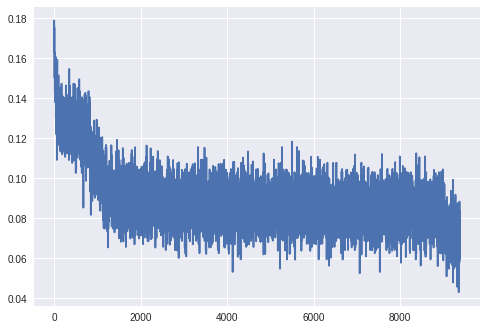

In [0]:
import matplotlib.pyplot as plt

plt.figure
plt.plot(history.losses)

In [0]:
# En realidad ya lo devuelve la función
hist = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0697 - binary_accuracy: 0.9301
Epoch 2/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0688 - binary_accuracy: 0.9310
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0676 - binary_accuracy: 0.9323
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0680 - binary_accuracy: 0.9318
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0680 - binary_accuracy: 0.9318
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0672 - binary_accuracy: 0.9327
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0667 - binary_accuracy: 0.9332
Epoch 8/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0669 - binary_accuracy: 0.9329
Epoch 9/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0671 - binary_accuracy:

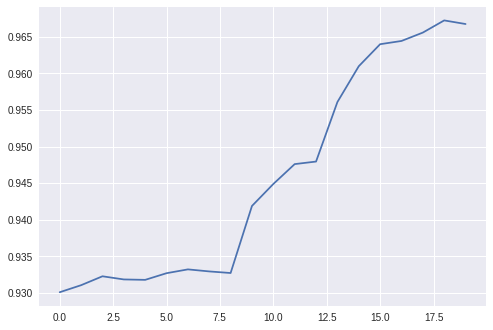

In [0]:
plt.figure
plt.plot(hist.history['binary_accuracy'])

In [0]:
# MODELO
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['binary_accuracy','mean_squared_error'])

# En realidad ya lo devuelve la función
hist2 = model.fit(x_train, y_train,
          epochs=20,
          batch_size=128,
          verbose=False)

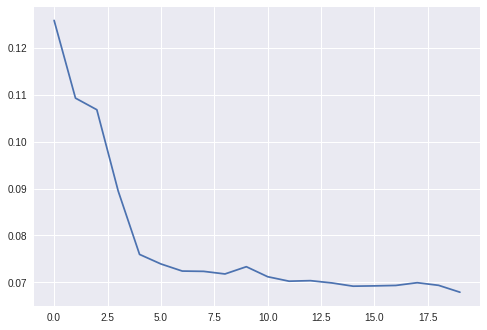

In [0]:
plt.figure
plt.plot(hist2.history['mean_squared_error'])